In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem 1

see the note on piazz

# Problem 2

The visualization that I choose and critique for this problem ccould be found at:

https://github.com/noahdemoes/DS5500_Homework1/blob/master/DS5500_Homework1.pdf

Describe the visualization and how it is similar and/or different from yours:

The similarity between my visualization and this one is that we both use line chart to represent the distribution of income across countries and continents over time. However, the diffference is that this one group the ountries by continent and present the distribution in four plots.

Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?

Yes, this visualization is easy to interpret and it also effectively visualize what is being asked. Since it divided the countries by continet and identify each contry by different color. So it is easy to find the distribution of income over time for a specific country in a given continent. 

# Problem 3

The visualization that I choose and critique for this problem ccould be found at:

https://github.com/chao-h/ds5500hw1/blob/master/README.md

Describe the visualization and how it is similar and/or different from yours:

The similarity between my visualization and this one is that we both use line chart to investigate the relationship between income (GDP / capita), life expectancy, and child mortality over time. However, the diffference is that this one also use dynamic visualizations to present the relationships for several typical continent.

Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?

Yes, this visualization is easy to interpret and it also effectively visualize what is being asked. Since it used dynamic visualizations, which contain more information and improve the way that we can access and interact with information compared with static visualizations.

# Problem 4

In [122]:
geo = pd.read_csv('ddf--entities--geo--country.csv')
geo = geo[['country','name','world_4region']]
geo.columns = ['country','name','continents']

In [123]:
gdp = pd.read_csv(
'ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
gdp_merged = gdp.merge(geo,left_on='geo',right_on='country')
gdp_merged.columns = ['geo','time','gdp','country','name','continents']

In [124]:
life_exp = pd.read_csv('ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [125]:
life_gdp = pd.merge(life_exp,gdp_merged,on=['geo','time'])

Based on the results homework 1, we know that there is huge difference of gdp between the different continents. To explore the relationship between gdp and life expectancy more precisely,I will explore this relationship independently for four continents. 

In [126]:
asia = life_gdp[life_gdp['continents']=='asia']
asia_x = asia[['time','gdp']].groupby('time').mean()
asia_y = asia[['time','life_expectancy_years']].groupby('time').mean()['life_expectancy_years']

americas = life_gdp[life_gdp['continents']=='americas']
americas_x = americas[['time','gdp']].groupby('time').mean()
americas_y = americas[['time','life_expectancy_years']].groupby('time').mean()['life_expectancy_years']

africa = life_gdp[life_gdp['continents']=='africa']
africa_x = africa[['time','gdp']].groupby('time').mean()
africa_y = africa[['time','life_expectancy_years']].groupby('time').mean()['life_expectancy_years']

europe = life_gdp[life_gdp['continents']=='europe']
europe_x = europe[['time','gdp']].groupby('time').mean()
europe_y = europe[['time','life_expectancy_years']].groupby('time').mean()['life_expectancy_years']

Text(0.5, 1.0, 'relationship betweem income (GDP per capita) and life expectancy over time')

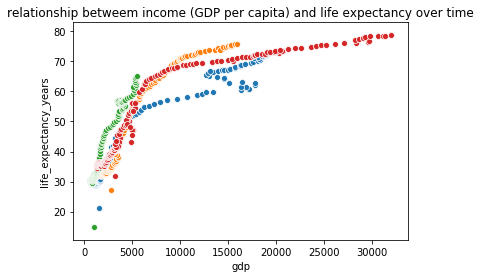

In [127]:
sns.scatterplot(asia_x['gdp'],asia_y)
sns.scatterplot(americas_x['gdp'],americas_y)
sns.scatterplot(africa_x['gdp'],africa_y)
sns.scatterplot(europe_x['gdp'],europe_y).set_title('relationship betweem income (GDP per capita) and life expectancy over time')

Text(0.5, 1.0, 'relationship betweem income (GDP per capita) and life expectancy over time after log transformation')

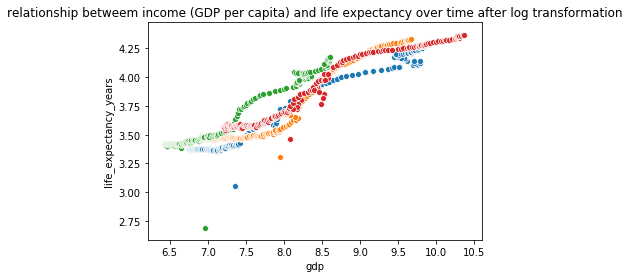

In [128]:
sns.scatterplot(np.log(asia_x['gdp']),np.log(asia_y))
sns.scatterplot(np.log(americas_x['gdp']),np.log(americas_y))
sns.scatterplot(np.log(africa_x['gdp']),np.log(africa_y))
sns.scatterplot(np.log(europe_x['gdp']),np.log(europe_y)).set_title('relationship betweem income (GDP per capita) and life expectancy over time after log transformation')

After log transformation, it seems that there is a linear relationships between GDP and life expectancy in the four continents. So I will use linear regression to explore the relationship between GDP and life expectancy over time.

However, using time series data will introduce the autocorrelation of time series in our model. In such a circumstance, the random errors in the model are often positively correlated over time, so that each random error is more likely to be similar to the previous random error that it would be if the random errors were independent of one another. That is to say the "independence" condition in the linear regression model would be influenced.

In [129]:
asia_train_x,asia_test_x,asia_train_y,asia_test_y = train_test_split(asia_x, asia_y, test_size = 0.2, random_state = 38)
americas_train_x,americas_test_x,americas_train_y,americas_test_y = train_test_split(americas_x, americas_y, test_size = 0.2, random_state = 38)
africa_train_x,africa_test_x,africa_train_y,africa_test_y = train_test_split(africa_x, africa_y, test_size = 0.2, random_state = 38)
europe_train_x,europe_test_x,europe_train_y,europe_test_y = train_test_split(europe_x, europe_y, test_size = 0.2, random_state = 38)

In [130]:
reg_asia = LinearRegression().fit(np.log(asia_train_x), np.log(asia_train_y))
reg_americas = LinearRegression().fit(np.log(americas_train_x),np.log(americas_train_y))
reg_africa = LinearRegression().fit(np.log(africa_train_x), np.log(africa_train_y))
reg_europe = LinearRegression().fit(np.log(europe_train_x), np.log(europe_train_y))

array([0.30876607])

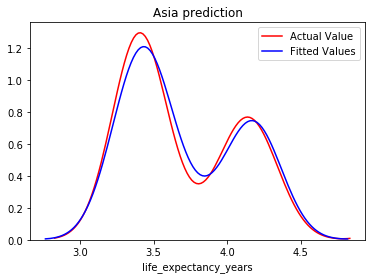

In [131]:
ax1 = sns.distplot(np.log(asia_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_asia.predict(np.log(asia_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Asia prediction')
reg_asia.coef_

array([0.36903847])

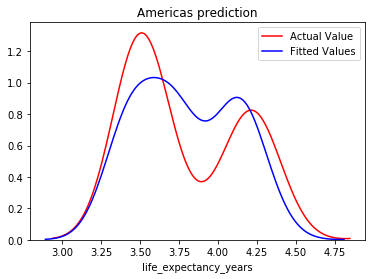

In [132]:
ax2 = sns.distplot(np.log(americas_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_americas.predict(np.log(americas_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax2).set_title('Americas prediction')
reg_americas.coef_

array([0.35540384])

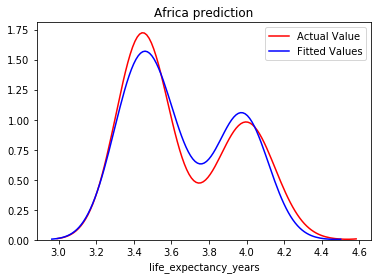

In [133]:
ax3 = sns.distplot(np.log(africa_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_africa.predict(np.log(africa_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax3).set_title('Africa prediction')
reg_africa.coef_

array([0.29079471])

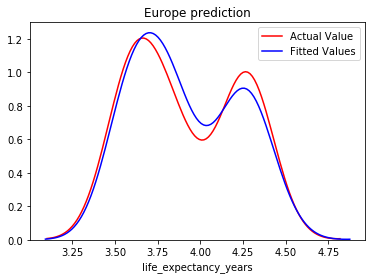

In [134]:
ax4 = sns.distplot(np.log(europe_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_europe.predict(np.log(europe_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax4).set_title('Europe prediction')
reg_europe.coef_

Based on the plots and the coefficients of the models for the different continents , we could know that the life expectancy is positively related to GDP over time. To be more specific, the life expectancy is more when the GDP is more over time.

# Problem 5

In [135]:
child_mrt = pd.read_csv(
'ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')

In [136]:
child_mrt_gdp = pd.merge(child_mrt ,gdp_merged,on=['geo','time'])
child_mrt_gdp.columns = ['geo','time','child_mortality','gdp','country','name','continents']

Based on the results homework 1, we know that there is huge difference of gdp between the different continents. To explore the relationship between gdp and child mortality more precisely,I will explore this relationship independently for four continents. 

In [137]:
asia = child_mrt_gdp[child_mrt_gdp['continents']=='asia']
asia_x = asia[['time','gdp']].groupby('time').mean()
asia_y = asia[['time','child_mortality']].groupby('time').mean()['child_mortality']

americas = child_mrt_gdp[child_mrt_gdp['continents']=='americas']
americas_x = americas[['time','gdp']].groupby('time').mean()
americas_y = americas[['time','child_mortality']].groupby('time').mean()['child_mortality']

africa = child_mrt_gdp[child_mrt_gdp['continents']=='africa']
africa_x = africa[['time','gdp']].groupby('time').mean()
africa_y = africa[['time','child_mortality']].groupby('time').mean()['child_mortality']

europe = child_mrt_gdp[child_mrt_gdp['continents']=='europe']
europe_x = europe[['time','gdp']].groupby('time').mean()
europe_y = europe[['time','child_mortality']].groupby('time').mean()['child_mortality']


Text(0.5, 1.0, 'relationship betweem income (GDP per capita) and child mortality over time')

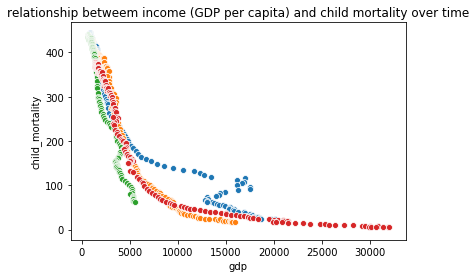

In [138]:
sns.scatterplot(asia_x['gdp'],asia_y)
sns.scatterplot(americas_x['gdp'],americas_y)
sns.scatterplot(africa_x['gdp'],africa_y)
sns.scatterplot(europe_x['gdp'],europe_y).set_title('relationship betweem income (GDP per capita) and child mortality over time')

Text(0.5, 1.0, 'relationship betweem income (GDP per capita) and life expectancy over time after log transformation')

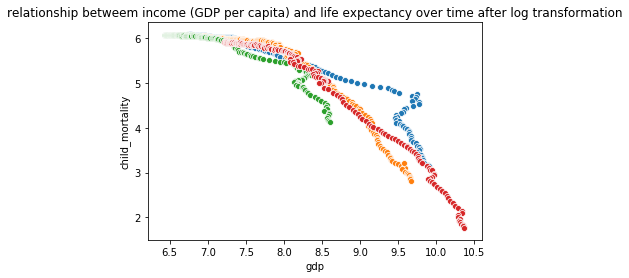

In [139]:
sns.scatterplot(np.log(asia_x['gdp']),np.log(asia_y))
sns.scatterplot(np.log(americas_x['gdp']),np.log(americas_y))
sns.scatterplot(np.log(africa_x['gdp']),np.log(africa_y))
sns.scatterplot(np.log(europe_x['gdp']),np.log(europe_y)).set_title('relationship betweem income (GDP per capita) and child mortality over time after log transformation')

After log transformation, it seems that there is a linear relationships between GDP and child mortality in the four continents. So I will use linear regression to explore the relationship between GDP and child mortality over time.

However, using time series data will introduce the autocorrelation of time series in our model. In such a circumstance, the random errors in the model are often positively correlated over time, so that each random error is more likely to be similar to the previous random error that it would be if the random errors were independent of one another. That is to say the "independence" condition in the linear regression model would be influenced.

In [140]:
asia_train_x,asia_test_x,asia_train_y,asia_test_y = train_test_split(asia_x, asia_y, test_size = 0.2, random_state = 38)
americas_train_x,americas_test_x,americas_train_y,americas_test_y = train_test_split(americas_x, americas_y, test_size = 0.2, random_state = 38)
africa_train_x,africa_test_x,africa_train_y,africa_test_y = train_test_split(africa_x, africa_y, test_size = 0.2, random_state = 38)
europe_train_x,europe_test_x,europe_train_y,europe_test_y = train_test_split(europe_x, europe_y, test_size = 0.2, random_state = 38)

In [141]:
reg_asia = LinearRegression().fit(np.log(asia_train_x), np.log(asia_train_y))
reg_americas = LinearRegression().fit(np.log(americas_train_x),np.log(americas_train_y))
reg_africa = LinearRegression().fit(np.log(africa_train_x), np.log(africa_train_y))
reg_europe = LinearRegression().fit(np.log(europe_train_x), np.log(europe_train_y))

array([-0.76543559])

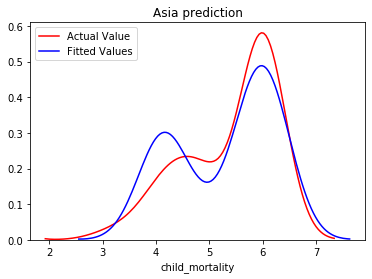

In [142]:
ax1 = sns.distplot(np.log(asia_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_asia.predict(np.log(asia_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Asia prediction')
reg_asia.coef_

array([-1.08045116])

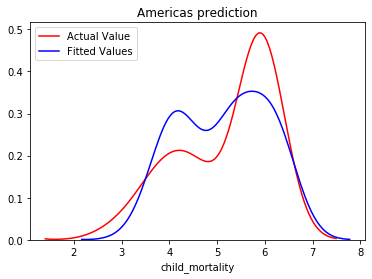

In [144]:
ax2 = sns.distplot(np.log(americas_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_americas.predict(np.log(americas_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax2).set_title('Americas prediction')
reg_americas.coef_

array([-0.69380175])

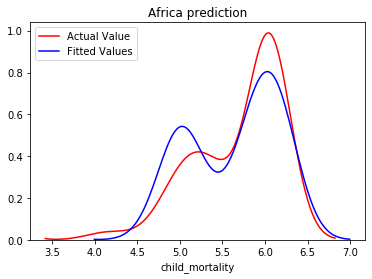

In [145]:
ax3 = sns.distplot(np.log(africa_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_africa.predict(np.log(africa_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax3).set_title('Africa prediction')
reg_africa.coef_

array([-1.23850392])

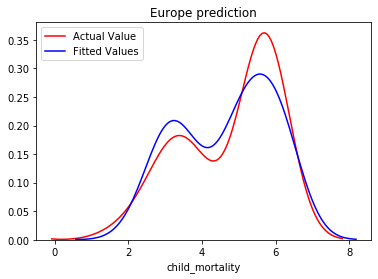

In [146]:
ax4 = sns.distplot(np.log(europe_test_y), hist=False, color="r", label="Actual Value")
sns.distplot(reg_europe.predict(np.log(europe_test_x)), hist=False, color="b", label="Fitted Values" , ax=ax4).set_title('Europe prediction')
reg_europe.coef_

Based on the plots and the coefficients of the models for the different continents , we could know that the child mortality is negatively related to GDP over time. To be more specific, the child mortality is less when the GDP is more over time